In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("."))

['.ipynb_checkpoints', 'random_tests.ipynb', 'data_viz.ipynb']


# Exploratory Analysis :
-------------------------------------------------

In [4]:
#train_data = pd.read_csv('../input/landmark-recognition-challenge/train.csv')
train_data = pd.read_csv('../CSV-files/train.csv')
test_data = pd.read_csv('../CSV-files/test.csv')
#submission = pd.read_csv('../CSV-files/sample_submission.csv')
train_data['id'] = train_data['id'].astype('category')
train_data['url'] = train_data['url'].astype('category')
train_data.head(4)

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429


In [5]:
train_data.info(); print("-" * 20);
test_data.info(); print("-" * 20);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225029 entries, 0 to 1225028
Data columns (total 3 columns):
id             1225029 non-null category
url            1225029 non-null category
landmark_id    1225029 non-null int64
dtypes: category(2), int64(1)
memory usage: 117.4 MB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117703 entries, 0 to 117702
Data columns (total 2 columns):
id     117703 non-null object
url    117703 non-null object
dtypes: object(2)
memory usage: 1.8+ MB
--------------------


In [6]:
# -> We can see that there are no missing values in both test and train data
print("Unique values in Train :\n",train_data.nunique())
print("Unique values in Test :\n",test_data.nunique())

# -> In the train dataset, there are only 14951 unique landmark_id data. All id's and url's are unique.
# -> All id's and url's are unique in the test data as well.

# Concatenate Train and test data
concatenated = pd.concat([train_data, test_data])
print("The shape of the resulted DataFrame: ",concatenated.shape)
concatenated.nunique()

# -> All id's and url's are unique for the concatenated data. That means we do not have any id's or url's from train dataset leaked in the test data set as well.


Unique values in Train :
 id             1225029
url            1225029
landmark_id      14951
dtype: int64
Unique values in Test :
 id     117703
url    117703
dtype: int64
The shape of the resulted DataFrame:  (1342732, 3)


id             1342732
landmark_id      14951
url            1342732
dtype: int64

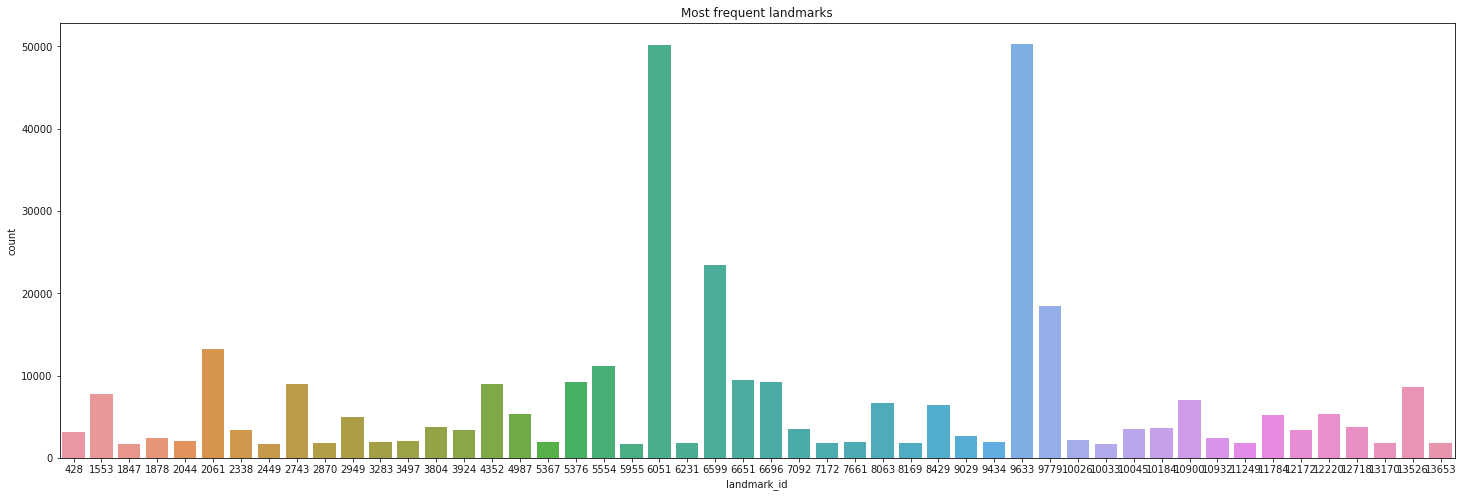

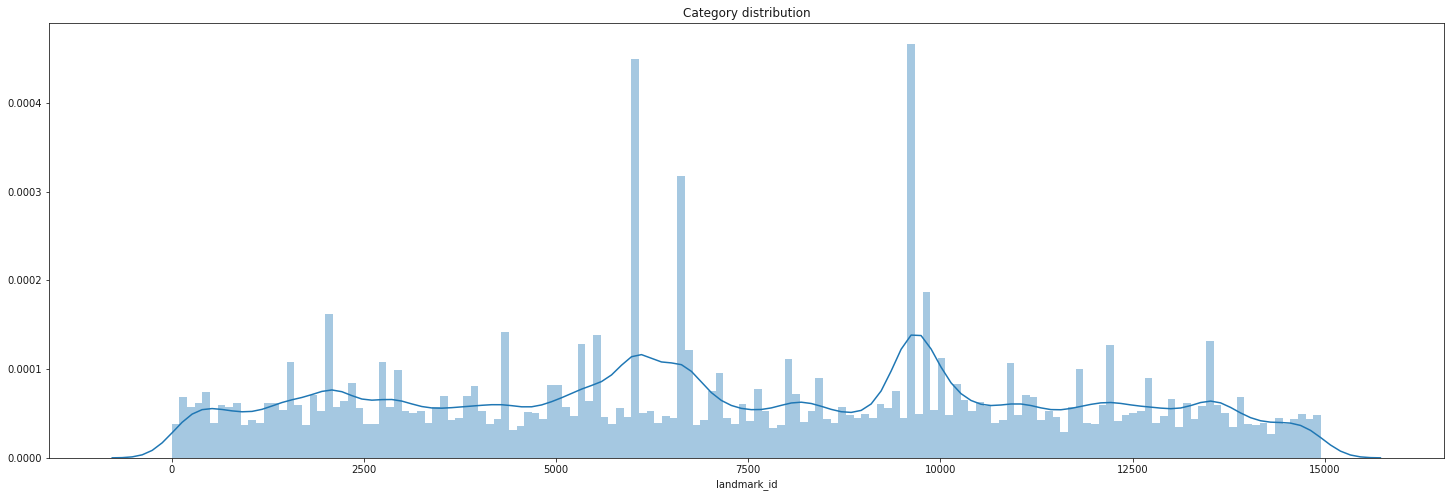

Number of classes under 25 occurence  9538  of  14951


In [7]:
# Occurance of landmark_id in decreasing order(Top categories)
IMAGES_NUMBER = 50
#temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(40))
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(IMAGES_NUMBER))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']

# Plot the most frequent landmark_ids
plt.figure(figsize = (25, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp)
plt.show()

# -> The most frequent landmark_id is 9633 and the count is 50337.
# -> There are many least frequent landmarks whose count is 1

plt.figure(figsize=(25, 8))
plt.title("Category distribution")
sns.distplot(train_data["landmark_id"], bins=150)
plt.show()

print("Number of classes under 25 occurence ",(train_data["landmark_id"].value_counts() <= 25).sum() ," of ", len(train_data["landmark_id"].unique()))




In [11]:
min_ = min(train_data["landmark_id"].value_counts())
max_ = max(train_data["landmark_id"].value_counts())
mean = train_data["landmark_id"].value_counts().mean()
median = train_data["landmark_id"].value_counts().median()
print(min_)
print(max_)
print(mean)
print(median)
print('highest label: ', np.argmax(train_data["landmark_id"].value_counts()))

1
50337
81.93625844425122
14.0
highest label:  9633


/home/shared/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [ ]:
print(sum(train_data["landmark_id"].value_counts() < 3))

In [35]:
for i in range(10):
    print(train_data["landmark_id"].value_counts().quantile(i/10))

1.0
4.0
5.0
7.0
9.0
14.0
22.0
34.0
62.0
142.0


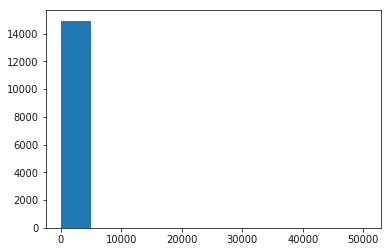

In [7]:
plt.hist(train_data["landmark_id"].value_counts())
plt.show()

# Display some images from URLs / Some URLs Visulization

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

def displayLandmarkImagesLarge(urls, category_name):
    img_style = "width: 200px; height:160px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])
    display(HTML(images_list))

category = train_data['landmark_id'].value_counts().keys()[15]
urls = train_data[train_data['landmark_id'] == category]['url']
displayLandmarkImagesLarge(urls, "")

In [ ]:
# Visualize 6 images for each of the first 5 landmarks, ordered by the number of occurences.
LANDMARK_NUMBER = 5
IMAGES_NUMBER = 6
landMarkIDs = pd.Series(train_data['landmark_id'].value_counts().keys())[1:LANDMARK_NUMBER+1]
for landMarkID in landMarkIDs:
    url = train_data[train_data['landmark_id'] == landMarkID]['url'].head(IMAGES_NUMBER)
    displayLandmarkImagesLarge(url, "")

# Extracting website name and adding new Column "site_name"

In [ ]:
# Extract site_names from train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//',1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names from test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/',1)[0])
test_data['site_name'] = temp_list

# Occurence of site in decreasing order(Top categories)
temp_train = pd.DataFrame(train_data.site_name.value_counts())
temp_test = pd.DataFrame(test_data.site_name.value_counts())

temp_train.reset_index(inplace= True); temp_test.reset_index(inplace= True)
temp_train.columns = temp_test.columns = ['site_name', 'count']
# Plot The sites with teir count
def draw_plot_site_names(SData):
    plt.figure(figsize=(25, 8))
    plt.title('Sites with their count')
    sns.set_color_codes("pastel")
    sns.barplot(x="site_name", y="count", data=SData, label="Count")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
draw_plot_site_names(temp_train)
draw_plot_site_names(temp_test)
# Total unique sites are 16 in train and 25 in test data

In [ ]:
# the expected format for the submission file
submission.head(6)

# -> Submission has two columns : an landmark id that is associated with the image and its corresponding confidence score.
# -- Some query images may contain no landmarks. For these, one can submit no landmark id (and no confidence score).

# Random Guessing

In [ ]:
# take the most frequent label
def_guess = train_data['landmark_id'].value_counts()/train_data['landmark_id'].value_counts().sum()

np.random.seed=15
r_idx = lambda : np.random.choice(def_guess.index, p = def_guess.values)

r_score = lambda idx: '%d %2.4f' % (def_guess.index[idx], def_guess.values[idx])
submission['landmarks'] = submission.id.map(lambda _: r_score(r_idx()))
submission.to_csv('rand_submission.csv', index=False)
submission.sample(2)

Reference: 
* [https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis](https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis)
* [https://www.kaggle.com/gpreda/google-landmark-recogn-challenge-data-exploration](https://www.kaggle.com/gpreda/google-landmark-recogn-challenge-data-exploration)
* [https://www.kaggle.com/kmader/baseline-landmark-model](https://www.kaggle.com/kmader/baseline-landmark-model)

In [ ]:
#import random
#random.seed = 22
#np.random.seed = 22
#for i in range(5):
#    vals = train_data.landmark_id.value_counts().index
#    submission['landmarks'] = submission['landmarks'].map(lambda x: ' '.join(map(str, [random.choice(vals), round(random.random(), 2)])))
#    submission.to_csv('submission' + str(i+1).zfill(2) +'.csv', index=False)
#    submission.head()

In [ ]:
# Use only the first 1000 most frequent landmarks in train set for building the test set values
import pylab as pl
pl.seed = 0
N = 1500
probs = train_data.landmark_id.value_counts() / train_data.shape[0]
probs = probs.iloc[:N]
probs = pd.DataFrame({'landmark_id': probs.index,
                      'probability': probs.values}, index=pl.arange(N))
T = pd.merge(train_data, probs, on='landmark_id', how='inner')
inx = pl.randint(0, T.shape[0], submission.shape[0])
submission['landmark_id'] = T.landmark_id.iloc[inx].values
submission['prob'] = T.probability.iloc[inx].values
submission['landmarks'] = submission.landmark_id.astype(str) + ' ' + submission.prob.astype(str)
submission[['id','landmarks']].to_csv('submission_MFreq.csv', index=False)
submission[['id','landmarks']].head()